<a href="https://colab.research.google.com/github/ChaudhryShehryar291/COLabbb/blob/main/Copy_of_22F22710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [1]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/human-horses/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/human-horses/test'    # Update with your actual path

In [10]:
import os
print(len(os.listdir('/content/drive/MyDrive/human-horses/train/horses')))
print(len(os.listdir('/content/drive/MyDrive/human-horses/train/humans')))
print(len(os.listdir('/content/drive/MyDrive/human-horses/test/horses')))
print(len(os.listdir('/content/drive/MyDrive/human-horses/test/humans')))

500
527
100
100


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [13]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [14]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [17]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.6033 - loss: 0.9296 - val_accuracy: 0.6732 - val_loss: 0.6873
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.9410 - loss: 0.1591 - val_accuracy: 0.9902 - val_loss: 0.0414
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9659 - val_loss: 0.0839
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9610 - val_loss: 0.0951
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9805 - val_loss: 0.0629
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 1.0000 - loss: 3.1228e-04 - val_accuracy: 0.9415 - val_loss: 0.2249
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 1.0000 - loss: 5.1096e-05 - val_accuracy: 0.9561 - val_loss: 0.1486
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 1.0000 - loss: 4.4411e-05 - val_

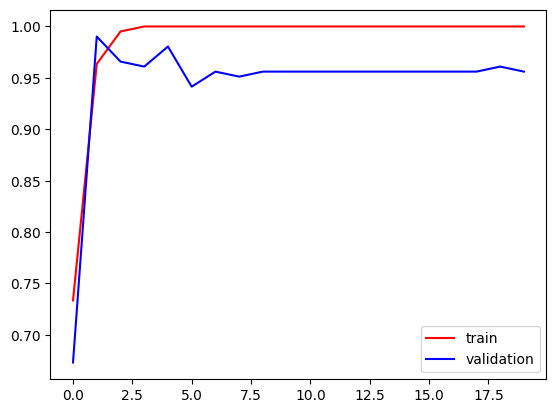

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

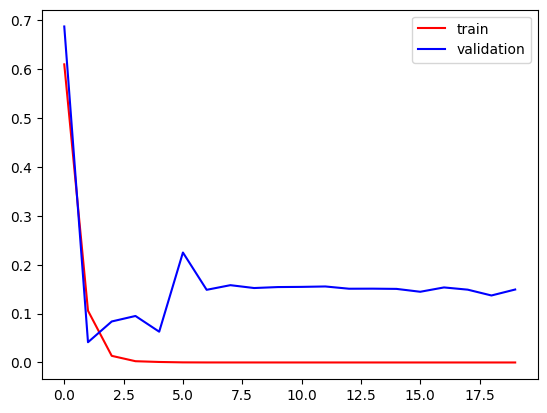

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [21]:
#predict the test data
predictions = model.predict(test_data)


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[45 55]
 [55 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45       100
           1       0.45      0.45      0.45       100

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



In [23]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 513ms/step - accuracy: 0.7739 - loss: 2.6312 - val_accuracy: 0.6780 - val_loss: 3.3635
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.9640 - loss: 0.7576 - val_accuracy: 0.6585 - val_loss: 4.2690
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.9723 - loss: 0.5765 - val_accuracy: 0.5854 - val_loss: 5.3675
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 0.9720 - loss: 0.5936 - val_accuracy: 0.5122 - val_loss: 32.0100
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.9884 - loss: 0.1892 - val_accuracy: 0.5122 - val_loss: 19.1555
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.9724 - loss: 0.6126 - val_accuracy: 0.4878 - val_loss: 74.3552
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.9819 - loss: 0.3961 - val_accuracy: 0.4878 - val_loss: 49.3938
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.9841 - loss: 0.4793 - val_acc

In [26]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [27]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[55 45]
 [45 55]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       100
           1       0.55      0.55      0.55       100

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 866ms/step - accuracy: 0.5339 - loss: 2.9985 - val_accuracy: 0.5463 - val_loss: 0.8274
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.7029 - loss: 0.6362 - val_accuracy: 0.7805 - val_loss: 0.5151
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.8086 - loss: 0.4106 - val_accuracy: 0.7366 - val_loss: 0.4416
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.8838 - loss: 0.2821 - val_accuracy: 0.6878 - val_loss: 0.5931
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.9284 - loss: 0.2321 - val_accuracy: 0.5512 - val_loss: 0.9191
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8849 - loss: 0.2730 - val_accuracy: 0.7463 - val_loss: 0.4117
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.9256 - loss: 0.2044 - val_accuracy: 0.7805 - val_loss: 0.3478
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.9468 - loss: 0.1758 - val_accur

In [32]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[28 72]
 [26 74]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.28      0.36       100
           1       0.51      0.74      0.60       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.48       200
weighted avg       0.51      0.51      0.48       200

